In [4]:
import pandas as pd #import the library
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv') #import the data set
df.head() # show the first 5 rows in the data set




,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
#Inspect the data

df.info() #Find missing values/non values

df.describe() #statical summery(min,max,mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
# Target variable(Y) is Sleep_Quality
# Features are Gender,	Age,	Occupation,	Sleep Duration,	Quality of Sleep,	Physical Activity, Level	Stress, Level	BMI, Category,	Blood Pressure,	Heart Rate,	Daily Steps,	Sleep Disorder

In [7]:
#Data Preprocessing (Crucial Step)
#Lable data(Lable encoder)

from sklearn.preprocessing import LabelEncoder

# 1. Split Blood Pressure into two columns
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# 2. Convert text columns to numbers (Label Encoding)
le = LabelEncoder()
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# 3. Define Features (X) and Target (y)
# Note:  removed 'Quality of Sleep' from X because it is your target
features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level',
            'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps',
            'Sleep Disorder', 'Systolic', 'Diastolic']

X = df[features]
y = df['Quality of Sleep'] # This is your target variable

print("Data is now numerical and ready!")
X.head()

Data is now numerical and ready!


,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,9,6.1,42,6,3,77,4200,2,126,83
1,1,28,1,6.2,60,8,0,75,10000,2,125,80
2,1,28,1,6.2,60,8,0,75,10000,2,125,80
3,1,28,6,5.9,30,8,2,85,3000,1,140,90
4,1,28,6,5.9,30,8,2,85,3000,1,140,90


In [8]:
#Feature Scaling (Very Important for SVM)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#Train and Evaluate Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train) # We use unscaled data for Random Forest

# Make predictions
rf_preds = rf_model.predict(X_test)

# Check results
print("--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, rf_preds) * 100:.2f}%")
print(classification_report(y_test, rf_preds))

--- Random Forest Performance ---
Accuracy: 100.00%
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        12

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [20]:
#Train and Evaluate SVM
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='linear', random_state=42) # You can try 'rbf' kernel later too!

# Train the model (Using SCALED data)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test_scaled)

# Check results
print("--- SVM Performance ---")
print(f"Accuracy: {accuracy_score(y_test, svm_preds) * 100:.2f}%")
print(classification_report(y_test, svm_preds))

--- SVM Performance ---
Accuracy: 96.00%
              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2
           5       0.33      1.00      0.50         1
           6       0.96      0.96      0.96        26
           7       1.00      0.88      0.93        16
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        12

    accuracy                           0.96        75
   macro avg       0.88      0.97      0.90        75
weighted avg       0.98      0.96      0.97        75



In [23]:
#Removing Biased and Irrelevant Features
#To solve the "Cheat Sheet" issue (Stress Level) and the "Identification" issue (Person ID), we simply drop those columns from your features variable X

# List of features to REMOVE
to_drop = ['Person ID', 'Stress Level', 'Quality of Sleep']

# Create a new X without these columns
X_refined = df.drop(columns=to_drop)
y = df['Quality of Sleep']

print("Refined Features:", X_refined.columns.tolist())

Refined Features: ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic']


In [24]:
#Fix: Data Redundancy and Overfitting
# Create a temporary dataframe to drop duplicates
# We drop duplicates based on everything except 'Person ID'
df_cleaned = df.drop(columns=['Person ID']).drop_duplicates()

print(f"Rows before: {len(df)} | Rows after removing duplicates: {len(df_cleaned)}")

# Now update your X and y based on this cleaned data
y = df_cleaned['Quality of Sleep']
X = df_cleaned.drop(columns=['Quality of Sleep', 'Stress Level'])


Rows before: 374 | Rows after removing duplicates: 132


In [26]:
from sklearn.preprocessing import LabelEncoder

# 1. Split Blood Pressure into 'Systolic' and 'Diastolic' numbers
# We use .str.split('/') to break '120/80' into two parts
df_cleaned[['Systolic', 'Diastolic']] = df_cleaned['Blood Pressure'].str.split('/', expand=True).astype(int)

# 2. Drop the original 'Blood Pressure' column because we don't need the string anymore
df_cleaned = df_cleaned.drop(columns=['Blood Pressure'])

# 3. Convert other text columns (Gender, Occupation, etc.) to numbers
le = LabelEncoder()
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))

# 4. Now re-define X and y with the fixed data
y = df_cleaned['Quality of Sleep']
X = df_cleaned.drop(columns=['Quality of Sleep', 'Stress Level'])

print("Data successfully converted to numbers!")
print(f"New columns: {X.columns.tolist()}")

Data successfully converted to numbers!
New columns: ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic']


In [30]:
#Split and Scale (The "Final Prep")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale the data (Important for SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Step 1 Complete: Data is split and scaled.")

Step 1 Complete: Data is split and scaled.


In [31]:
#Train and Compare (The "Actual ML")
#Random Forest and SVM and see which one predicts sleep quality better

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train) # RF works fine with unscaled data
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# 2. SVM
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train) # SVM MUST use scaled data
svm_acc = accuracy_score(y_test, svm.predict(X_test_scaled))

print(f"Random Forest Accuracy: {rf_acc * 100:.2f}%")
print(f"SVM Accuracy: {svm_acc * 100:.2f}%")

Random Forest Accuracy: 96.30%
SVM Accuracy: 96.30%


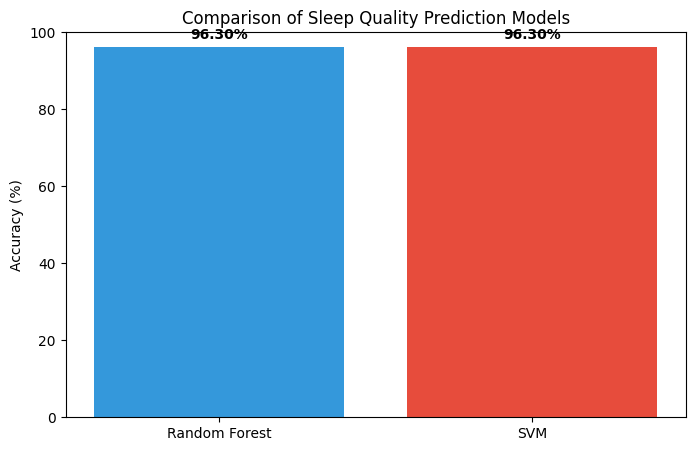

In [32]:
#Visualize the Result (The "Engineering Report")

import matplotlib.pyplot as plt

model_names = ['Random Forest', 'SVM']
accuracies = [rf_acc * 100, svm_acc * 100]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['#3498db', '#e74c3c'])
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Sleep Quality Prediction Models')
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, f"{v:.2f}%", ha='center', fontweight='bold')
plt.show()

In [34]:
#save your model to a file
import joblib

# Save the Random Forest model to a file
joblib.dump(rf, 'sleep_quality_model.pkl')
joblib.dump(scaler, 'scaler.pkl') # Save the scaler too!

print("Model saved! You can now download 'sleep_quality_model.pkl' from the Colab files tab.")

Model saved! You can now download 'sleep_quality_model.pkl' from the Colab files tab.


In [35]:
#Mapping Numbers to "Poor, Fair, Good, Excellent"
def categorize_sleep(score):
    if score <= 5: return 'Poor'
    elif score <= 6: return 'Fair'
    elif score <= 8: return 'Good'
    else: return 'Excellent'

# Apply categorization
df_cleaned['Sleep_Category'] = df_cleaned['Quality of Sleep'].apply(categorize_sleep)

# Check the new distribution
print(df_cleaned['Sleep_Category'].value_counts())

Sleep_Category
Good         64
Fair         36
Excellent    22
Poor         10
Name: count, dtype: int64


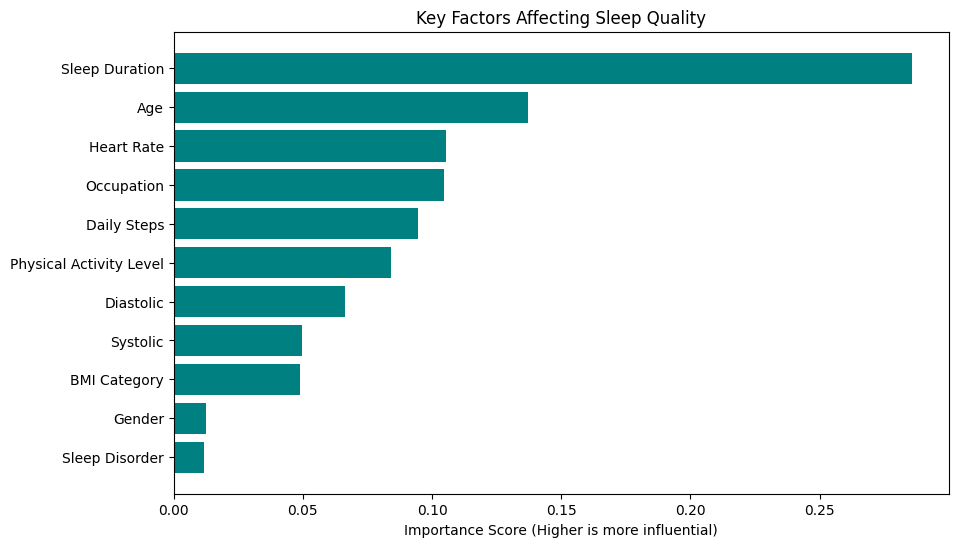

In [36]:
#Identify "Key Factors" (Feature Importance)

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from your trained Random Forest
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Key Factors Affecting Sleep Quality')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score (Higher is more influential)')
plt.show()